<a href="https://colab.research.google.com/github/MarkNgendo/HOUSE-PRICE-PREDICTION/blob/main/Moringa_W7_IP_Mark_Ngendo_05_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context of the study

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

## Metric for Success

- To build a model that predicts the price of houses with   anacceptably high accuracy.
- To identify variables with the most weight when it comes to predicting the price.

## Importing libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Checking for completeness

In [ ]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Checking for Duplicated entries

In [ ]:
df.duplicated().sum()

3

In [ ]:
# Dropping the duplicated values

df.drop_duplicates(inplace=True)

## Understanding the variables in the dataframe

In [ ]:
df.shape

(21610, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

In [ ]:
# Dropping unnecesary columns
df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21610.0,540178.944840,367387.585054,75000.0,321612.50,450000.00,645000.00,7700000.0
bedrooms,21610.0,3.370847,0.930110,0.0,3.00,3.00,4.00,33.0
bathrooms,21610.0,2.114739,0.770204,0.0,1.75,2.25,2.50,8.0
sqft_living,21610.0,2079.881212,918.500299,290.0,1425.50,1910.00,2550.00,13540.0
sqft_lot,21610.0,15108.289820,41423.226737,520.0,5040.00,7619.00,10688.75,1651359.0
floors,21610.0,1.494239,0.539994,1.0,1.00,1.50,2.00,3.5
waterfront,21610.0,0.007543,0.086523,0.0,0.00,0.00,0.00,1.0
view,21610.0,0.234197,0.766136,0.0,0.00,0.00,0.00,4.0
condition,21610.0,3.409440,0.650764,1.0,3.00,3.00,4.00,5.0
grade,21610.0,7.656779,1.175500,1.0,7.00,7.00,8.00,13.0


## Outliers

In [ ]:
def outliers(df):
  for i in df.describe().columns:
    q1 = df.describe().at['25%', i]
    q3 = df.describe().at['75%', i]

    iqr = q3 - q1

    upper = q3 + 1.5 * iqr
    lower = q1 + 1.5 * iqr

    p = []
    y = np.array(df[i])

    for j in y:
      if j < lower or j > upper:
       p.append(j)

    print(f"Outliers for {i}, count is {len(p)}")
    print(p)
    print("===========================================")

In [ ]:
outliers(df)

Outliers for price, count is 19851
[221900.0, 538000.0, 180000.0, 604000.0, 510000.0, 1230000.0, 257500.0, 291850.0, 229500.0, 323000.0, 662500.0, 468000.0, 310000.0, 400000.0, 530000.0, 650000.0, 395000.0, 485000.0, 189000.0, 230000.0, 385000.0, 2000000.0, 285000.0, 252700.0, 329000.0, 233000.0, 667000.0, 438000.0, 719000.0, 580500.0, 280000.0, 687500.0, 535000.0, 322500.0, 696000.0, 550000.0, 640000.0, 240000.0, 605000.0, 625000.0, 775000.0, 685000.0, 309000.0, 488000.0, 210490.0, 785000.0, 450000.0, 1350000.0, 228000.0, 345000.0, 600000.0, 585000.0, 292500.0, 301000.0, 430000.0, 650000.0, 289000.0, 505000.0, 549000.0, 425000.0, 317625.0, 287000.0, 204000.0, 1330000.0, 325000.0, 571000.0, 360000.0, 349000.0, 380000.0, 480000.0, 410000.0, 720000.0, 390000.0, 360000.0, 355000.0, 356000.0, 315000.0, 305000.0, 461000.0, 215000.0, 335000.0, 243500.0, 153000.0, 430000.0, 700000.0, 247500.0, 199000.0, 314000.0, 437500.0, 555000.0, 699950.0, 290000.0, 375000.0, 460000.0, 188500.0, 680000.0, 

It's worth noting that this is a lot. For zipcode, years, views, grade, condition, waterfront, floors, bathrooms and bedrooms 'outliers' are not things that should be considered as that: outliers. The square ft measurements just indicate that different houses have different sizes. For the price, 19,000+ entries are being flagged as outliers yet the entire dataset has close to 22,000 entries. Removing them would compromise the models to be built.

## Univariate analysis

In [ ]:
# Measures of dispersion

In [ ]:
for i in list(df.columns):
  print(f"For {i}: ")
  print("Median: ", df[i].median())
  print("Mode: ", df[i].mode())
  print("Mean: ", df[i].mean())
  print("Standard Deviation: ", df[i].std())
  print("Kurtosis: ", df[i].kurt())
  print("Skewness: ", df[i].skew())
  print("===================================")

For price: 
Median:  450000.0
Mode:  0    350000.0
1    450000.0
dtype: float64
Mean:  540178.9448403517
Standard Deviation:  367387.58505388984
Kurtosis:  34.517437729615054
Skewness:  4.021467451317612
For bedrooms: 
Median:  3.0
Mode:  0    3
dtype: int64
Mean:  3.370846830171217
Standard Deviation:  0.9301096999846462
Kurtosis:  49.06010825423431
Skewness:  1.9742435470953739
For bathrooms: 
Median:  2.25
Mode:  0    2.5
dtype: float64
Mean:  2.114738546968996
Standard Deviation:  0.770203702285374
Kurtosis:  1.2796371646131974
Skewness:  0.5111642830477003
For sqft_living: 
Median:  1910.0
Mode:  0    1300
dtype: int64
Mean:  2079.881212401666
Standard Deviation:  918.5002986169898
Kurtosis:  5.242222911342459
Skewness:  1.4715321846904306
For sqft_lot: 
Median:  7619.0
Mode:  0    5000
dtype: int64
Mean:  15108.289819527996
Standard Deviation:  41423.2267370033
Kurtosis:  285.0406214916321
Skewness:  13.059170061304911
For floors: 
Median:  1.5
Mode:  0    1.0
dtype: float64
Mean

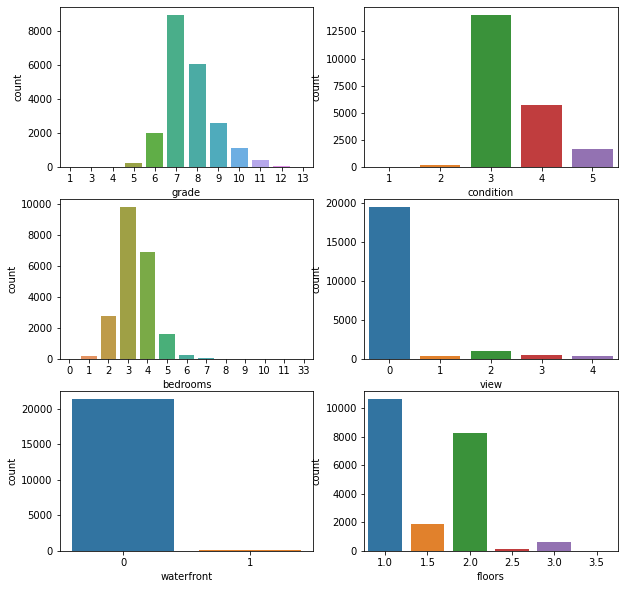

In [ ]:
# Count plots
cols = ['grade', 'condition', 'bedrooms', 'view', 'waterfront', 'floors']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

axes = axes.flatten()
index = 0
for i in cols:
  sns.countplot(x=i, data=df, ax=axes[index])
  index += 1
  

plt.show()


## Bivariate analysis

<Figure size 720x720 with 0 Axes>

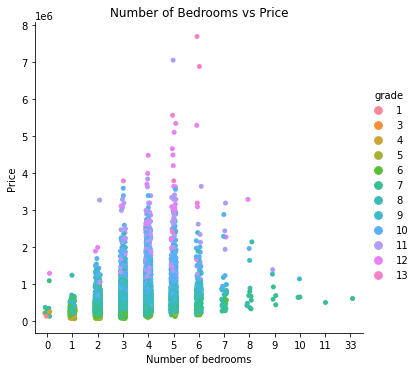

In [ ]:
# Bedrooms vs Price and house grade

plt.figure(figsize=(10,10))
sns.catplot(x='bedrooms', y='price', data=df, hue='grade')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()


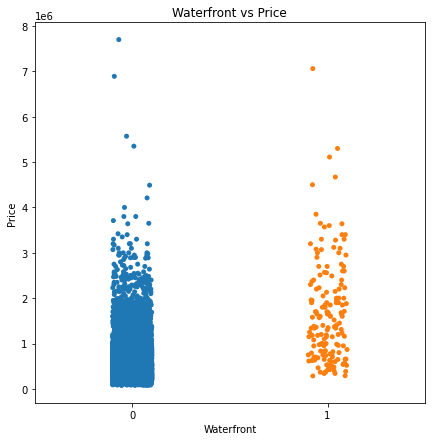

In [ ]:
# Price vs Waterfront

plt.figure(figsize=(7,7))
sns.stripplot(x='waterfront', y='price', data=df)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Waterfront vs Price')
plt.show()

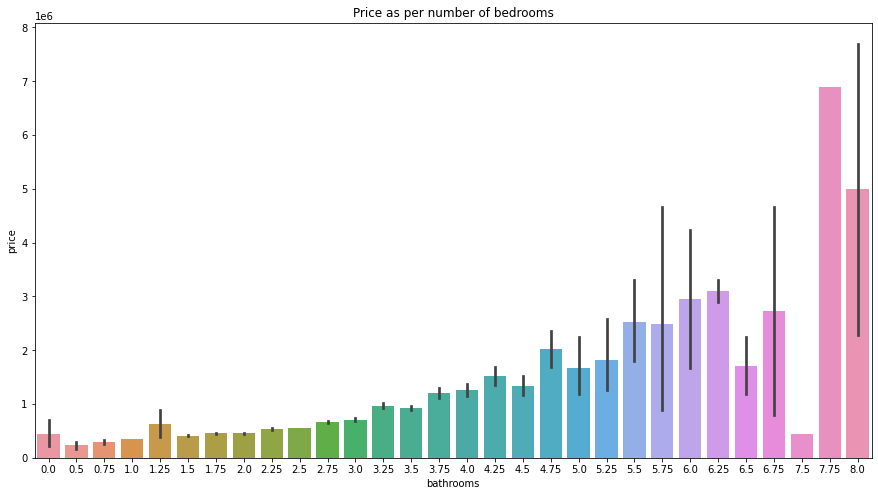

In [ ]:
# Number of bathrooms vs Price

plt.figure(figsize=(15,8))
sns.barplot(data=df, x='bathrooms', y='price')
plt.title('Price as per number of bedrooms')
plt.show()

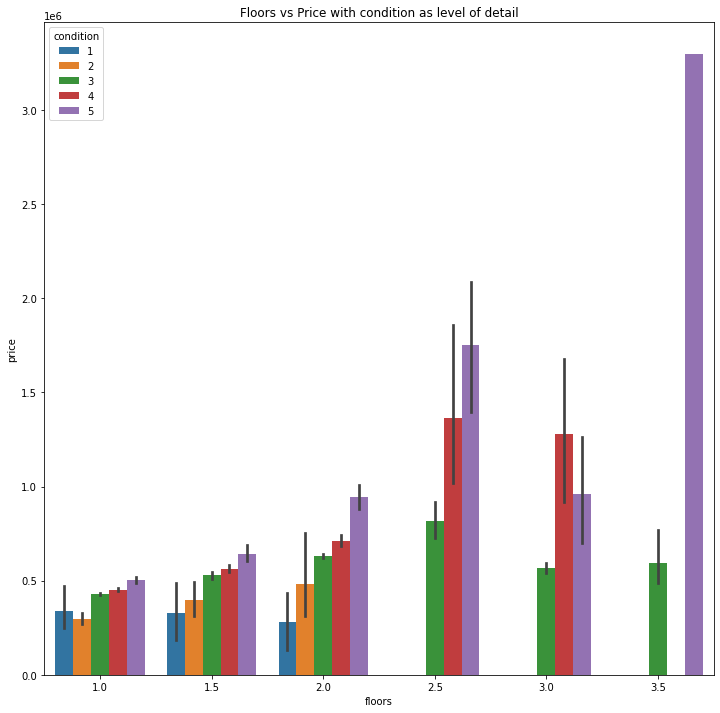

In [ ]:
# Floors vs Number of price vs condition of the house as well

plt.figure(figsize=(12,12))
sns.barplot(data=df, x='floors', y='price', hue='condition')
plt.title('Floors vs Price with condition as level of detail')
plt.show()

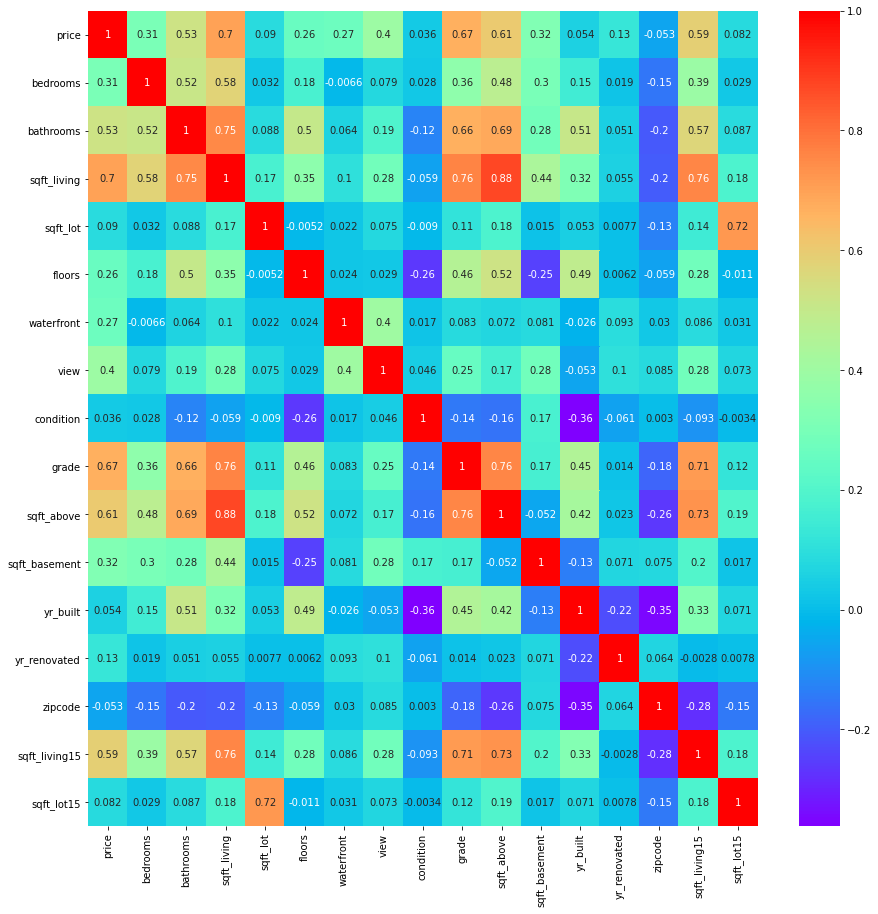

In [ ]:
# Checking for correlations
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()

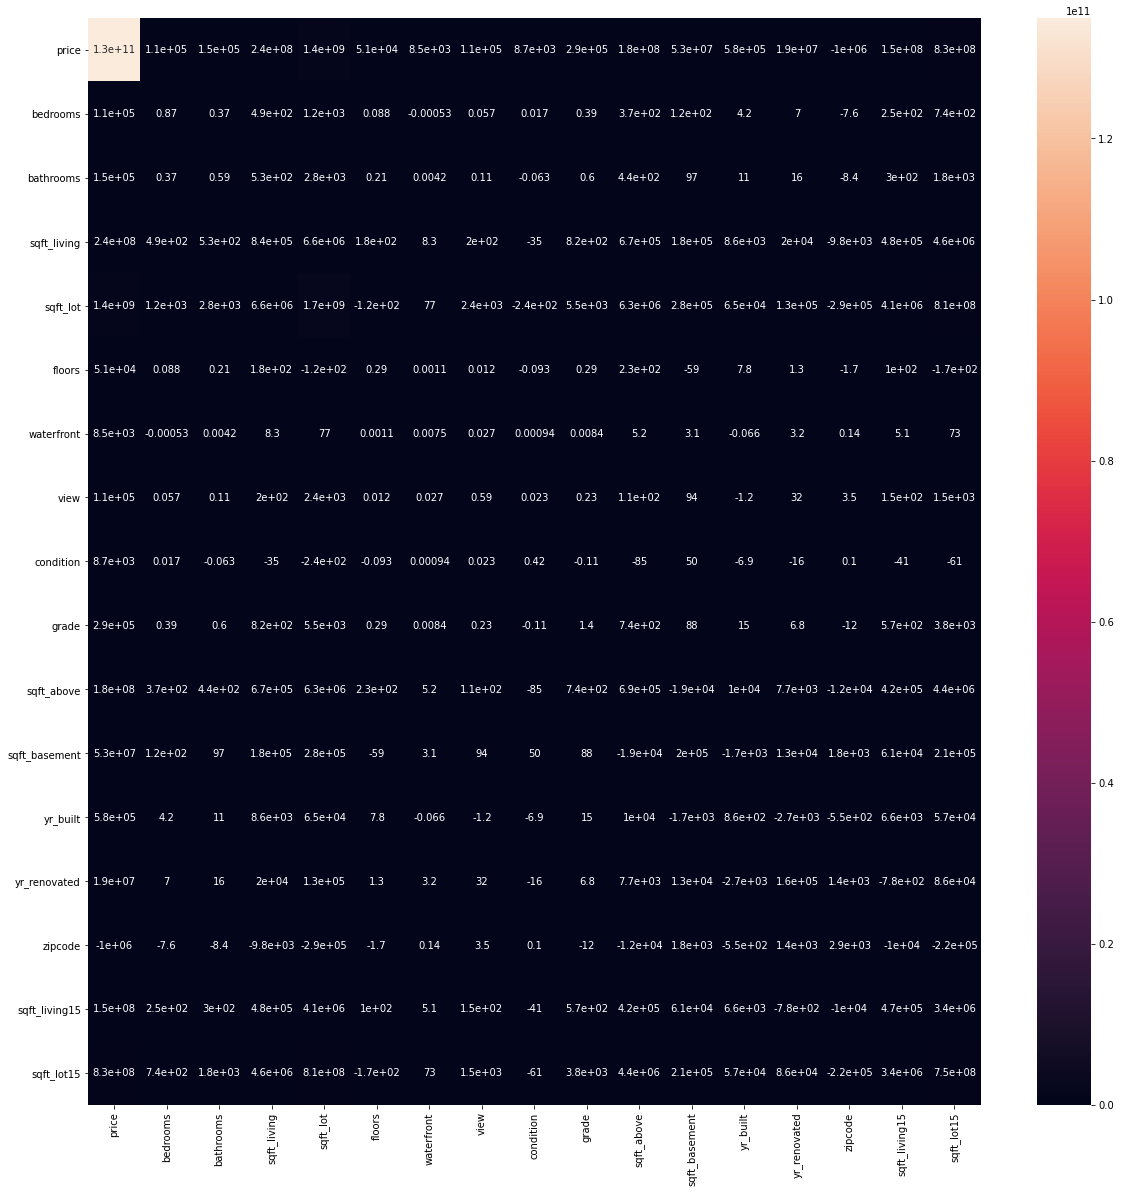

In [ ]:
# checking for covariance

plt.figure(figsize=(20,20))
sns.heatmap(df.cov(), annot=True)
plt.show()

## Modeling

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
# Feature selection
X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Baseline model

In [ ]:
# Creating a baseline linear model
baseline = LinearRegression(normalize=True)
baseline.fit(X,y)


# Scoring the baseline model
print("MSE baseline: ", mean_squared_error(y, baseline.predict(X)))
print("R^2 score baseline: ", r2_score(y, baseline.predict(X)))


MSE baseline:  46722316812.520775
R^2 score baseline:  0.6538251484160036


In [ ]:
coef_dict_baseline = {}

for coef, feat in zip(baseline.coef_, X.columns):
  coef_dict_baseline[feat] = coef

### Linear model (trained)

In [ ]:
linear = LinearRegression(normalize=True)
linear.fit(X_train, y_train)

# scoring the Linear Model
print("MSE for linear model: ", mean_squared_error(y_test, linear.predict(X_test)))
print("R2 Score for linear model: ", r2_score(y_test, linear.predict(X_test)))

MSE for linear model:  48752753995.72858
R2 Score for linear model:  0.6644601808204934


In [ ]:
# Cross validating the scores
linear_accuracy = cross_val_score(estimator=linear,
                                  X=X_train,
                                  y=y_train,
                                  scoring='r2',
                                  cv=5)

linear_accuracy.mean()

0.6447984696420158

In [ ]:
# Dictionary of coeficients
coef_dict_linear = {}

for coef, feat in zip(linear.coef_, X_test.columns):
  coef_dict_linear[feat] = coef

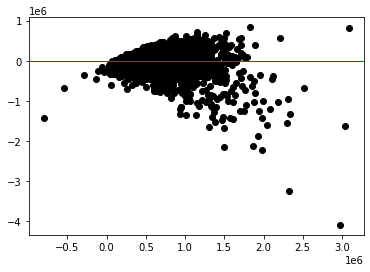

In [ ]:
# Residuals

residuals = np.subtract(linear.predict(X_test), y_test)

plt.scatter(linear.predict(X_test), residuals, color='black')
plt.axhline(y=residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Test heteroskedasticity
import scipy as sp
test_result, p_value =  sp.stats.bartlett(linear.predict(X_test), residuals)

dof = len(linear.predict(X_test)) - 1
probability = 1 - p_value
cv = sp.stats.chi2.ppf(probability, dof)

if (test_result > cv):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



the variances are homogeneous!


### Lasso Model


In [ ]:
lasso = Lasso()



#### Hyperparameter tuning of Lasso

In [ ]:
import warnings
warnings.filterwarnings("ignore")

search = GridSearchCV(estimator=lasso,
                      param_grid = {'alpha' :  np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))},
                      cv=10,
                      scoring='r2')
search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
search.best_params_

{'alpha': 24.0}

#### Fitting Lasso model


In [ ]:
lasso = Lasso(alpha=24)
lasso.fit(X_train, y_train)

Lasso(alpha=24, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
# Scoring the Lasso model

print("MSE: ", mean_squared_error(y_test, lasso.predict(X_test)))
print("R2_Score: ", r2_score(y_test, lasso.predict(X_test)))

MSE:  48768218523.86118
R2_Score:  0.6643537465260582


In [ ]:
# Cross validation
lasso_accuracy = cross_val_score(estimator=lasso,
                                 X=X_train,
                                 y=y_train,
                                 scoring='r2',
                                 cv=5)

lasso_accuracy.mean()

0.6446822180612264

In [ ]:
# Coefficients dictionary
coef_dict_lasso = {}
for coef, feat in zip(lasso.coef_, X_test.columns):
  coef_dict_lasso[feat] = coef

### Ridge Model


In [ ]:
ridge = Ridge(normalize=True)

#### Hyperparamter tuning of Ridge

In [ ]:
search = GridSearchCV(estimator=ridge,
                      param_grid ={'alpha' : np.logspace(-5,2, 8)},
                      scoring='neg_mean_squared_error',
                      n_jobs=1,
                      refit=True,
                      cv=10
)

search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
search.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

#### Fitting tuned model

In [ ]:
ridge = Ridge(normalize=True, alpha=0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Scoring the ridge model

print("Ridge MSE: ", mean_squared_error(y_test, ridge.predict(X_test)))
print("Ridge R2_Score: ", r2_score(y_test, ridge.predict(X_test)))

Ridge MSE:  48758870865.628944
Ridge R2_Score:  0.6644180815901506


In [ ]:
# Cross validating the model.
ridge_accuracy = cross_val_score(estimator=ridge,
                                 X=X_train,
                                 y=y_train,
                                 cv=5,
                                 scoring='r2')

ridge_accuracy.mean()

0.6446893736587266

In [ ]:
# Coefficient dictionary
coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_, X_test.columns):
  coef_dict_ridge[feat] = coef

### Elastic Net regression

#### Hyperparameter tuning of Elastic net

In [ ]:
elastic = ElasticNet(normalize=True)


search = GridSearchCV(estimator=elastic,
                  param_grid={'alpha' : np.logspace(-5, 2, 8),
                             'l1_ratio' : [.2, .4, .6, .8]},
                  scoring='neg_mean_squared_error',
                  cv=10,
                  refit=True,
                  n_jobs=1)

search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
search.best_estimator_

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### Fitting Elastic Net

In [ ]:
elastic = ElasticNet(alpha=1e-05, normalize=True, l1_ratio=0.8)

elastic.fit(X_train, y_train)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Scoring the model
print("MSE of Elastic Net: ", mean_squared_error(y_test, elastic.predict(X_test)))
print("Elastic Net R2_Score: ", r2_score(y_test, elastic.predict(X_test)))

MSE of Elastic Net:  48988431349.110825
Elastic Net R2_Score:  0.6628381363192635


In [ ]:
# Cross validating the model

elastic_accuracy = cross_val_score(estimator=elastic,
                                   cv=5,
                                   scoring='r2',
                                   X=X_train,
                                   y=y_train)

elastic_accuracy.mean()

0.6445890627881187

In [ ]:
# COEFICIENTS DICTIONARY
coef_dict_elastic = {}
for coef, feat in zip(elastic.coef_, X_test.columns):
  coef_dict_elastic[feat] = coef

### Quantile Regression

In [ ]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ sqft_living + grade + sqft_above + bathrooms + sqft_above + bedrooms ', df)
res9 = model.fit(q=.9)
print('For the 90th percentile')
print("=====================================")
res9.summary()

For the 90th percentile


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4223
Model:                       QuantReg   Bandwidth:                   2.995e+04
Method:                 Least Squares   Sparsity:                    1.253e+06
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        10:10:23   Df Residuals:                    21604
                                        Df Model:                            5
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.101e+05   2.99e+04    -13.695      0.000   -4.69e+05   -3.51e+05
sqft_living   394.9768      7.985     49.467      0.000     379.326     410.627
grade        1.104e+05   4264.705     25.877      0.000    1.02e+05    1.19e+05
sqft_above    -72.5214      6.533    -11.100      0.000     -85.327     -59.716
bathrooms   -7.134e+04   5904.152    -12.084      0.000   -8.29e+04   -5.98e+04
bedrooms    -5.111e+04   5000.906    -10.221      0.000   -6.09e+04   -4.13e+04
===============================================================================

The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = smf.quantreg('y ~ sqft_living + grade + sqft_above + bathrooms + sqft_above + bedrooms ', df)
res1 = model.fit(q=.1)
print('For the 10th percentile')
print("=====================================")
res1.summary()

For the 10th percentile


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.2199
Model:                       QuantReg   Bandwidth:                   2.508e+04
Method:                 Least Squares   Sparsity:                    4.789e+05
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        10:12:17   Df Residuals:                    21604
                                        Df Model:                            5
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.369e+05   7745.413    -30.585      0.000   -2.52e+05   -2.22e+05
sqft_living   101.8003      2.658     38.300      0.000      96.590     107.010
grade        5.627e+04   1254.132     44.868      0.000    5.38e+04    5.87e+04
sqft_above    -20.7421      2.529     -8.202      0.000     -25.699     -15.785
bathrooms    4438.4759   1880.632      2.360      0.018     752.298    8124.654
bedrooms    -1.869e+04   1206.674    -15.487      0.000   -2.11e+04   -1.63e+04
===============================================================================

The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = smf.quantreg('y ~ sqft_living + grade + sqft_above + bathrooms + sqft_above + bedrooms ', df)
res5 = model.fit(q=.9)
print('For the 50th percentile')
print("=====================================")
res5.summary()

For the 50th percentile


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4223
Model:                       QuantReg   Bandwidth:                   2.995e+04
Method:                 Least Squares   Sparsity:                    1.253e+06
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        10:13:36   Df Residuals:                    21604
                                        Df Model:                            5
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.101e+05   2.99e+04    -13.695      0.000   -4.69e+05   -3.51e+05
sqft_living   394.9768      7.985     49.467      0.000     379.326     410.627
grade        1.104e+05   4264.705     25.877      0.000    1.02e+05    1.19e+05
sqft_above    -72.5214      6.533    -11.100      0.000     -85.327     -59.716
bathrooms   -7.134e+04   5904.152    -12.084      0.000   -8.29e+04   -5.98e+04
bedrooms    -5.111e+04   5000.906    -10.221      0.000   -6.09e+04   -4.13e+04
===============================================================================

The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Creating an accuracy dataframe

accuracies = {'Baseline' :  r2_score(y, baseline.predict(X)),
                                     'Linear' : r2_score(y_test, linear.predict(X_test)),
                                     'Lasso' : r2_score(y_test, lasso.predict(X_test)),
                                     'Ridge' : r2_score(y_test, ridge.predict(X_test)),
                                     'Elastic' : r2_score(y_test, elastic.predict(X_test))}
                          

model_accuracy = pd.DataFrame.from_dict(data=accuracies, orient='index', columns=['r2_scores'])
model_accuracy.sort_values(by='r2_scores', ascending=False)

,r2_scores
Linear,0.664460
Ridge,0.664418
Lasso,0.664354
Elastic,0.662838
Baseline,0.653825


## Comparing coeficients and scores

In [ ]:
df1 = pd.DataFrame.from_dict(coef_dict_linear, columns=['Linear'], orient='index')
df2 = pd.DataFrame.from_dict(coef_dict_lasso, columns=['Lasso'], orient='index')
df3 = pd.DataFrame.from_dict(coef_dict_ridge, orient='index', columns=['Ridge'])
df4 = pd.DataFrame.from_dict(coef_dict_elastic, orient='index', columns=['Elastic'])

compare = pd.concat([df1, df2, df3, df4], axis=1)
compare

,Linear,Lasso,Ridge,Elastic
bedrooms,-41885.920470,-41851.458569,-41750.768042,-38009.972637
bathrooms,49512.180782,49415.012177,49419.610427,47141.833471
sqft_living,81.211624,287.349191,81.176527,80.084117
sqft_lot,-0.030458,-0.030662,-0.030410,-0.029434
floors,28927.285596,28816.005887,28920.510723,28650.425969
waterfront,471880.712949,468367.086451,471502.713455,460980.177355
view,46498.659256,46634.018913,46538.151221,47571.579130
condition,19606.757773,19542.743735,19684.730002,21613.750991
grade,115409.366628,115375.767817,115141.222148,108093.040540
sqft_above,75.890679,-130.144077,75.853631,74.719898


# Recommendations

A clear concensus from all the models is that the following variables have the biggest impact on Price:
- Bedrooms
- Grade
- Floors
- Bathrooms
- Waterfront
- Condition
- View


The first four models performed roughly the same having a score of  approximately 66% with Quantile regression had the worst performance out of all of them. Any one of the four can be used though, there may be a more fitted for this analysis.